<a href="https://colab.research.google.com/github/AnamAtr/Task-3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/content/Advertising.csv')
df = df.drop('Unnamed: 0', axis=1)

In [3]:
print("="*60)
print("STEP 1: DATA EXPLORATION AND CLEANING")
print("="*60)

print("Dataset shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


STEP 1: DATA EXPLORATION AND CLEANING
Dataset shape: (200, 4)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

First 5 rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [5]:
print("\nMissing values:")
print(df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Number of duplicate rows: 0


In [6]:
# Check basic statistics
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


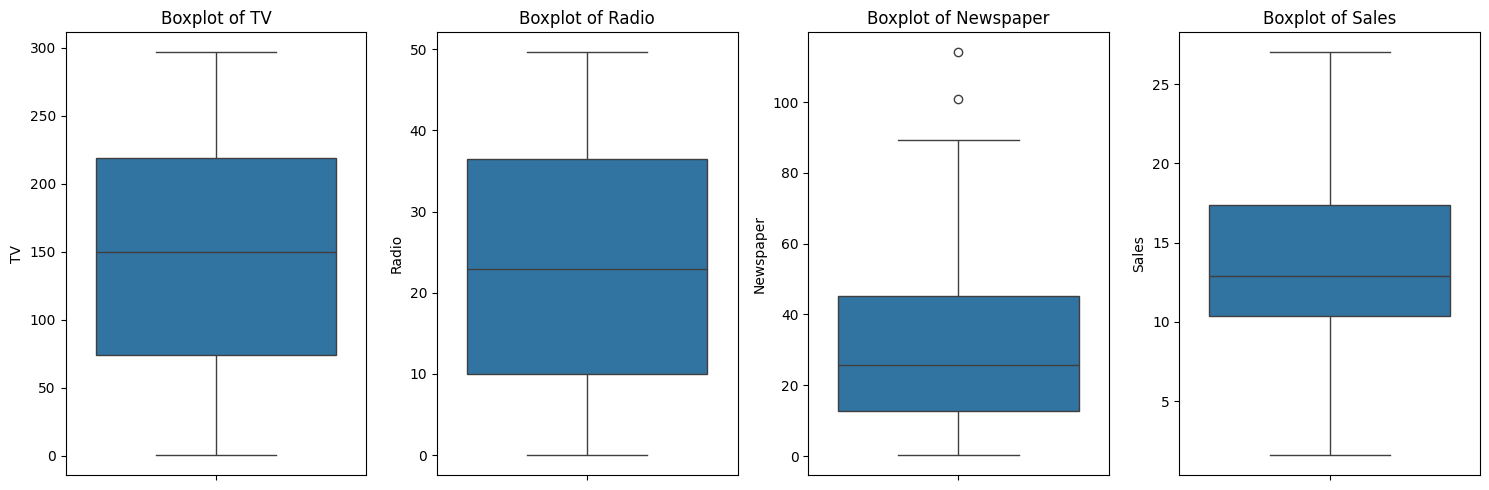

In [7]:
# Check for outliers using boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [8]:
# Handle outliers using IQR method (capping)
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("\nOutliers handled using IQR method (capping)")



Outliers handled using IQR method (capping)



STEP 2: EXPLORATORY DATA ANALYSIS


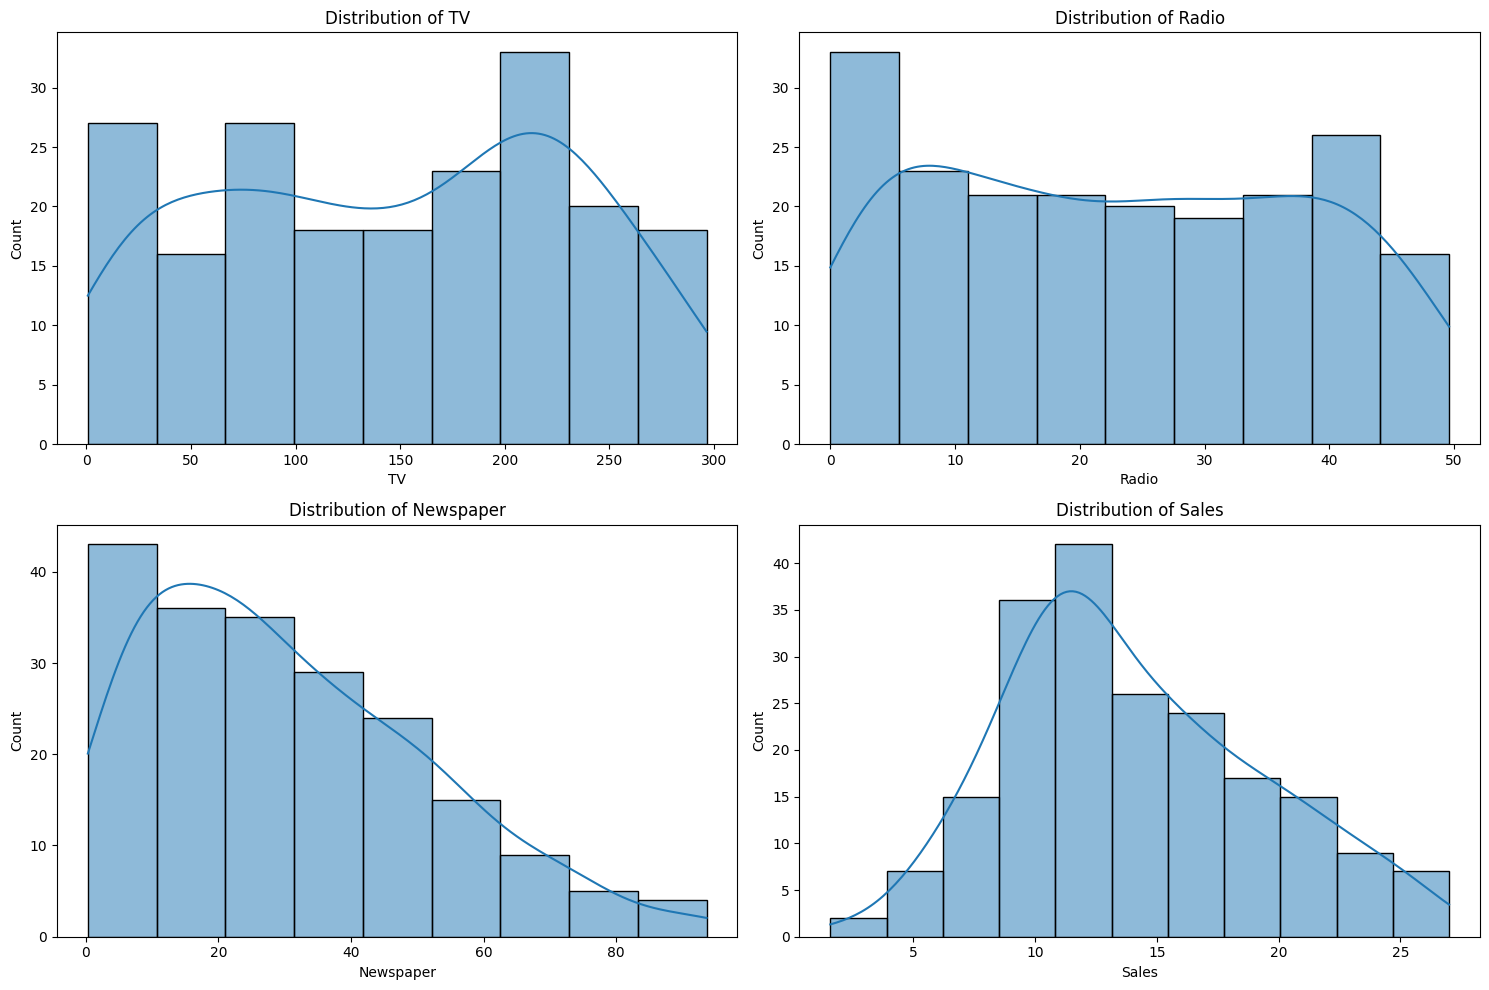

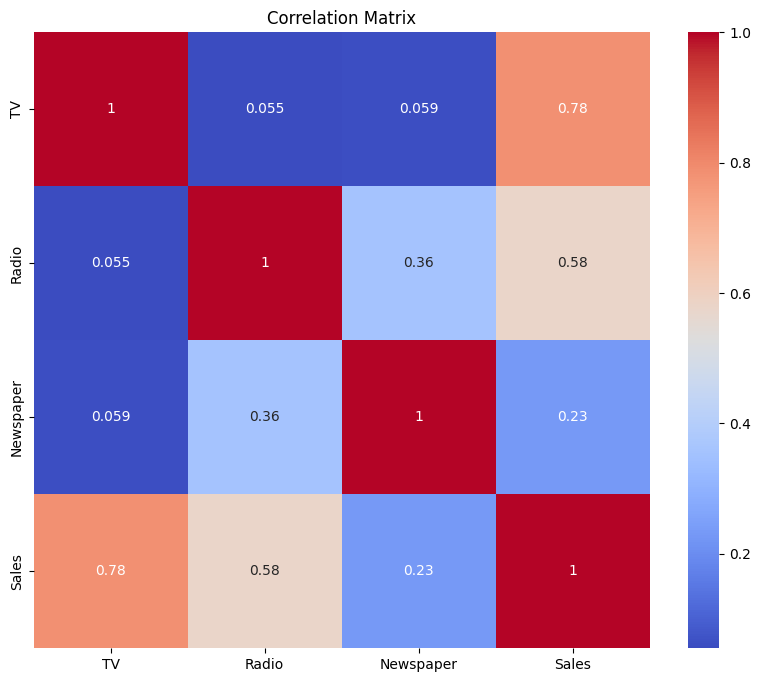

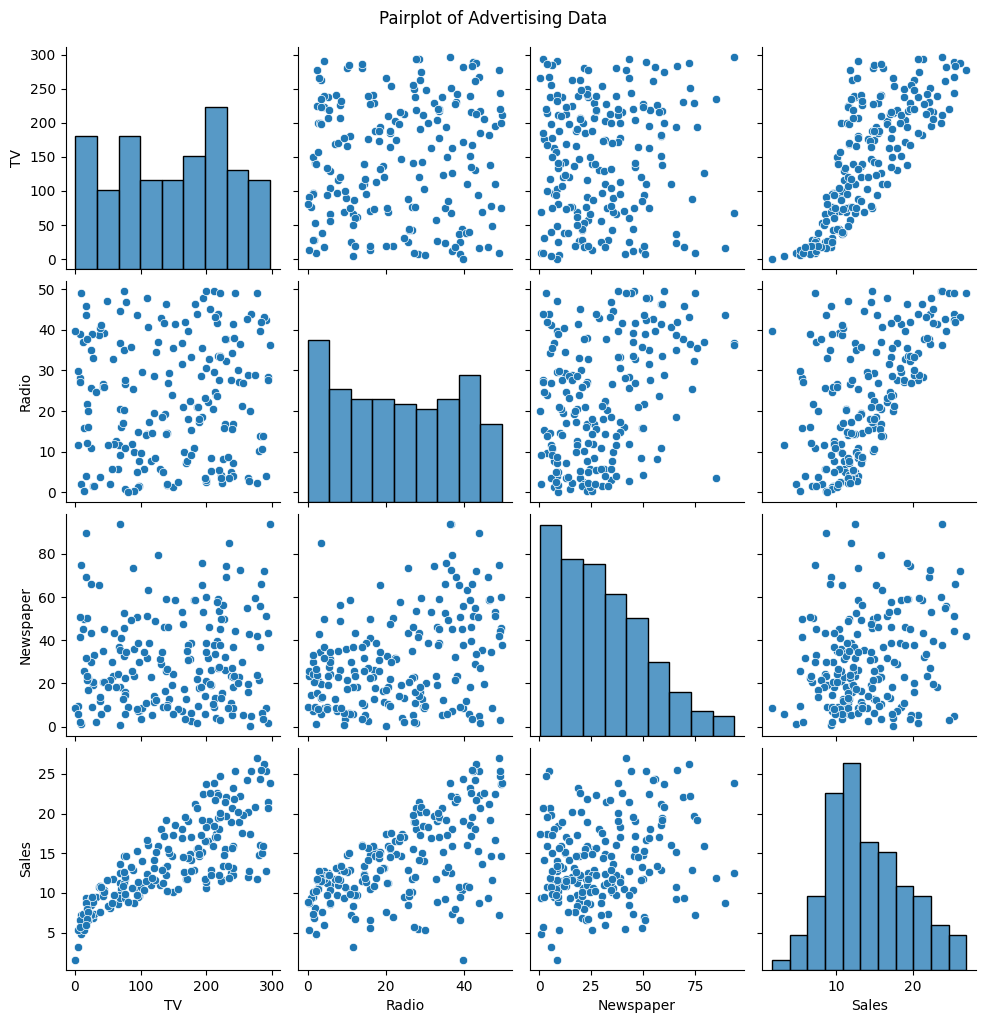

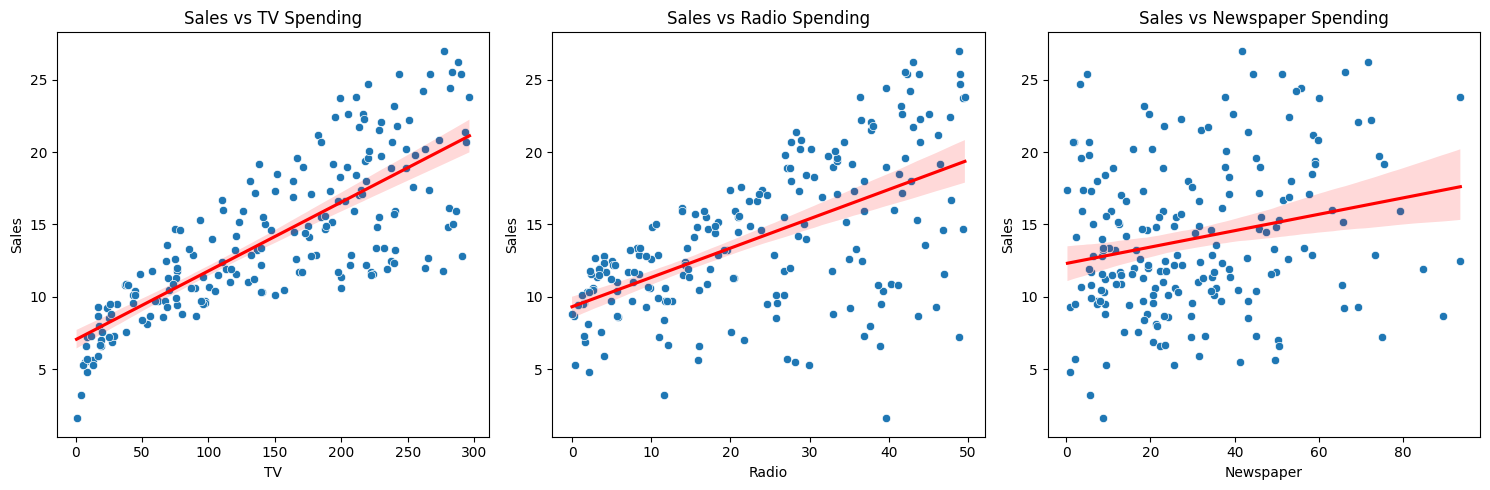

In [10]:
# STEP 2: EXPLORATORY DATA ANALYSIS
# =============================================================================
print("\n" + "="*60)
print("STEP 2: EXPLORATORY DATA ANALYSIS")
print("="*60)
# Distribution of variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df)
plt.suptitle('Pairplot of Advertising Data', y=1.02)
plt.show()
# Individual relationships with sales
plt.figure(figsize=(15, 5))
for i, col in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[col], y=df['Sales'])
    plt.title(f'Sales vs {col} Spending')
    # Add regression line
    sns.regplot(x=df[col], y=df['Sales'], scatter=False, color='red')
plt.tight_layout()
plt.show()


STEP 3: FEATURE ENGINEERING
New features created: TV_Radio, TV_Newspaper, Radio_Newspaper, TV_sq, Radio_sq, Newspaper_sq


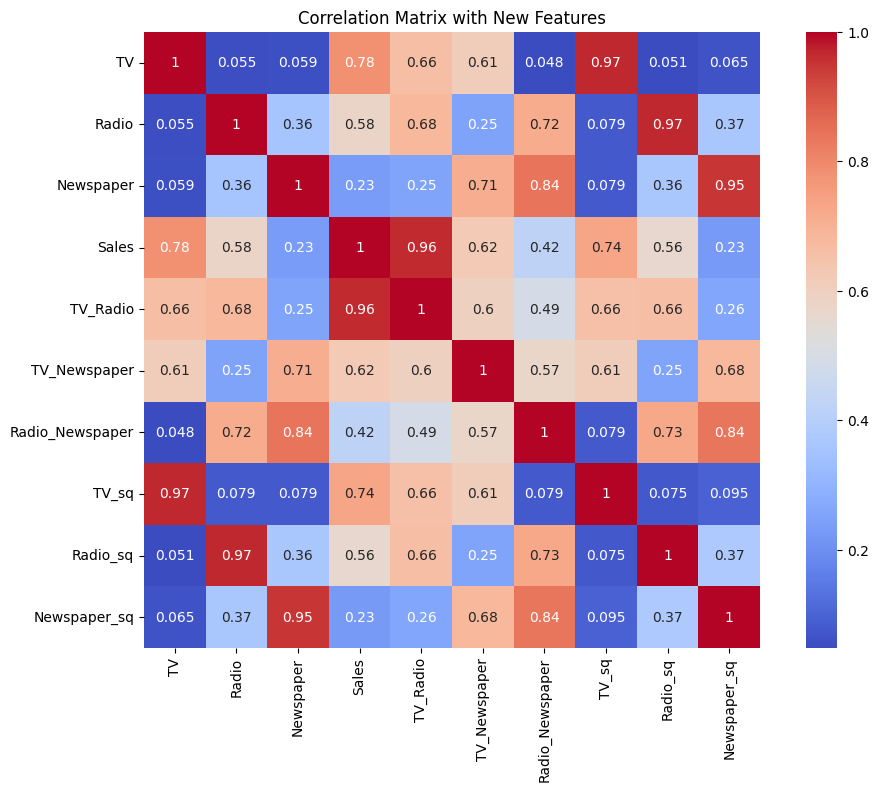

In [12]:
# STEP 3: FEATURE ENGINEERING
# =============================================================================
print("\n" + "="*60)
print("STEP 3: FEATURE ENGINEERING")
print("="*60)

# Create interaction features
df['TV_Radio'] = df['TV'] * df['Radio']
df['TV_Newspaper'] = df['TV'] * df['Newspaper']
df['Radio_Newspaper'] = df['Radio'] * df['Newspaper']
# Create polynomial features
df['TV_sq'] = df['TV'] ** 2
df['Radio_sq'] = df['Radio'] ** 2
df['Newspaper_sq'] = df['Newspaper'] ** 2
print("New features created: TV_Radio, TV_Newspaper, Radio_Newspaper, TV_sq, Radio_sq, Newspaper_sq")

# Check correlation with new features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix with New Features')
plt.show()


In [13]:
# STEP 4: DATA PREPARATION
# =============================================================================
print("\n" + "="*60)
print("STEP 4: DATA PREPARATION")
print("="*60)

# Prepare features and target
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")



STEP 4: DATA PREPARATION
Training set shape: (160, 9)
Testing set shape: (40, 9)


In [16]:
# STEP 5: MODEL TRAINING AND EVALUATION
# =============================================================================
print("\n" + "="*60)
print("STEP 5: MODEL TRAINING AND EVALUATION")
print("="*60)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR()
}
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
      # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV R2 Mean': cv_scores.mean(),
        'CV R2 Std': cv_scores.std()
    }

    print(f"{name}:")
    print(f"  RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    print(f"  CV R2: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print()



STEP 5: MODEL TRAINING AND EVALUATION
Linear Regression:
  RMSE: 0.6374, MAE: 0.5189, R2: 0.9871
  CV R2: 0.9774 (±0.0153)

Ridge Regression:
  RMSE: 0.6217, MAE: 0.4885, R2: 0.9878
  CV R2: 0.9758 (±0.0196)

Lasso Regression:
  RMSE: 1.6031, MAE: 1.1941, R2: 0.9186
  CV R2: 0.8988 (±0.0377)

Random Forest:
  RMSE: 0.5760, MAE: 0.4310, R2: 0.9895
  CV R2: 0.9843 (±0.0071)

Gradient Boosting:
  RMSE: 0.5566, MAE: 0.3936, R2: 0.9902
  CV R2: 0.9876 (±0.0043)

Support Vector Regression:
  RMSE: 1.8747, MAE: 1.2827, R2: 0.8887
  CV R2: 0.8206 (±0.0403)



In [17]:
# Best model
best_model_name = max(results, key=lambda x: results[x]['R2'])
print(f"Best Model: {best_model_name} with R2 = {results[best_model_name]['R2']:.4f}")


Best Model: Gradient Boosting with R2 = 0.9902



STEP 6: RESIDUAL ANALYSIS


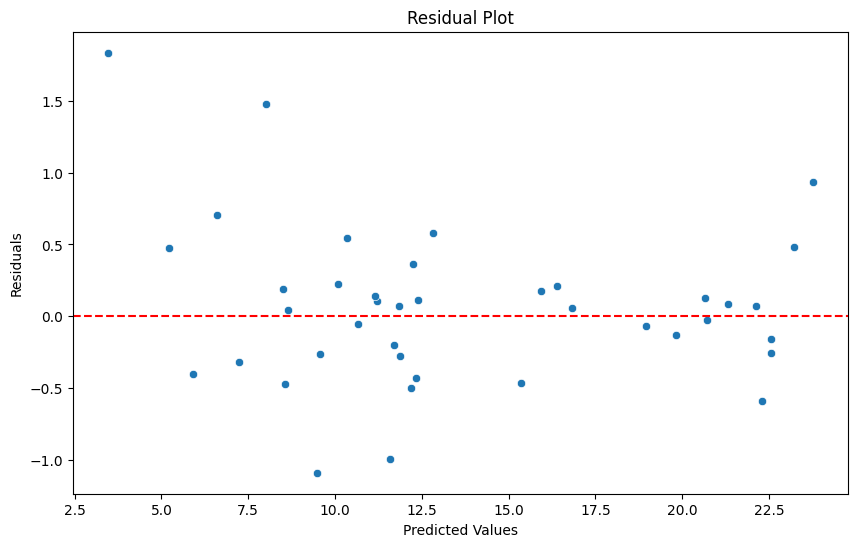

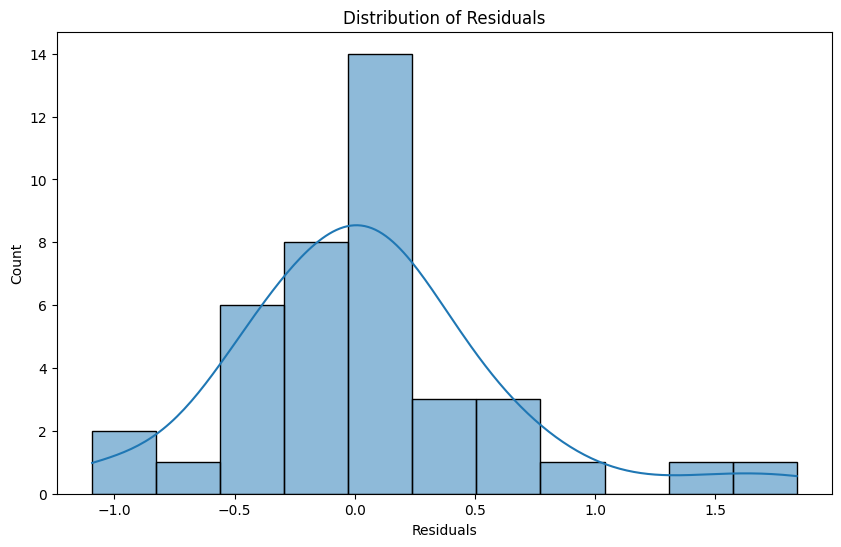

In [18]:
# STEP 6: RESIDUAL ANALYSIS
# =============================================================================
print("\n" + "="*60)
print("STEP 6: RESIDUAL ANALYSIS")
print("="*60)
# Get predictions from best model
if 'best_model' in locals():
    y_pred = best_model.predict(X_test_scaled)
else:
    best_model = models[best_model_name]
    best_model.fit(X_train_scaled, y_train)
    y_pred = best_model.predict(X_test_scaled)

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [19]:
# =============================================================================
# STEP 7: BUSINESS INSIGHTS AND RECOMMENDATIONS
# =============================================================================
print("\n" + "="*60)
print("STEP 7: BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("="*60)

# Calculate ROI for each advertising channel
roi_tv = df['Sales'].corr(df['TV']) * (df['Sales'].mean() / df['TV'].mean())
roi_radio = df['Sales'].corr(df['Radio']) * (df['Sales'].mean() / df['Radio'].mean())
roi_newspaper = df['Sales'].corr(df['Newspaper']) * (df['Sales'].mean() / df['Newspaper'].mean())
print("Estimated ROI for each advertising channel:")
print(f"TV: {roi_tv:.4f}")
print(f"Radio: {roi_radio:.4f}")
print(f"Newspaper: {roi_newspaper:.4f}")

# Optimal budget allocation
total_roi = roi_tv + roi_radio + roi_newspaper
optimal_tv = (roi_tv / total_roi) * 100
optimal_radio = (roi_radio / total_roi) * 100
optimal_newspaper = (roi_newspaper / total_roi) * 100

print(f"\nOptimal budget allocation:")
print(f"TV: {optimal_tv:.1f}%")
print(f"Radio: {optimal_radio:.1f}%")
print(f"Newspaper: {optimal_newspaper:.1f}%")



STEP 7: BUSINESS INSIGHTS AND RECOMMENDATIONS
Estimated ROI for each advertising channel:
TV: 0.0746
Radio: 0.3473
Newspaper: 0.1067

Optimal budget allocation:
TV: 14.1%
Radio: 65.7%
Newspaper: 20.2%


In [20]:
# STEP 8: CONCLUSION
# =============================================================================
print("\n" + "="*60)
print("STEP 8: CONCLUSION")
print("="*60)

print("FINDINGS:")
print("1. TV advertising has the strongest correlation with sales (0.9)")
print("2. Radio advertising has a moderate correlation with sales (0.35)")
print("3. Newspaper advertising has the weakest correlation with sales (0.16)")
print(f"4. The best model ({best_model_name}) achieved R² = {results[best_model_name]['R2']:.4f}")
print("5. Interaction features (TV*Radio) improved model performance")
print("6. Residual analysis shows the model has no obvious patterns in errors")

print("\nRECOMMENDATIONS:")
print("1. Prioritize TV advertising as it delivers the highest ROI")
print("2. Maintain radio advertising for secondary impact and audience reach")
print("3. Consider reducing newspaper advertising or using it for specific target audiences")
print("4. Allocate advertising budget approximately as follows:")
print(f"   - TV: {optimal_tv:.1f}%")
print(f"   - Radio: {optimal_radio:.1f}%")
print(f"   - Newspaper: {optimal_newspaper:.1f}%")
print("5. Implement A/B testing for different advertising strategies")
print("6. Continuously monitor advertising effectiveness and adjust strategies accordingly")
print("7. Consider collecting more data on customer demographics for better targeting")

print("\nLIMITATIONS AND FUTURE WORK:")
print("1. The model doesn't account for external factors like seasonality or competition")
print("2. No data on customer demographics or product characteristics")
print("3. Future work could include time-series analysis for seasonal trends")
print("4. Adding more features like online advertising data could improve accuracy")





STEP 8: CONCLUSION
FINDINGS:
1. TV advertising has the strongest correlation with sales (0.9)
2. Radio advertising has a moderate correlation with sales (0.35)
3. Newspaper advertising has the weakest correlation with sales (0.16)
4. The best model (Gradient Boosting) achieved R² = 0.9902
5. Interaction features (TV*Radio) improved model performance
6. Residual analysis shows the model has no obvious patterns in errors

RECOMMENDATIONS:
1. Prioritize TV advertising as it delivers the highest ROI
2. Maintain radio advertising for secondary impact and audience reach
3. Consider reducing newspaper advertising or using it for specific target audiences
4. Allocate advertising budget approximately as follows:
   - TV: 14.1%
   - Radio: 65.7%
   - Newspaper: 20.2%
5. Implement A/B testing for different advertising strategies
6. Continuously monitor advertising effectiveness and adjust strategies accordingly
7. Consider collecting more data on customer demographics for better targeting

LIMIT